Problem Statement: -
Kitabi Duniya, a famous book store in India,which was established before Independence, the growth of
the company was incremental year by year, but due to online selling of books and wide spread Internet
access its annual growth started to collapse, seeing sharp downfalls, you as a Data Scientist help this 
heritage book store gain its popularity back and increase footfall of customers and provide ways the 
business can improve exponentially, apply Association RuleAlgorithm, explain the rules, and visualize 
the graphs for clear understanding of solution.

Business Objectives:
    
1)Increase Footfall: First goal is to increase the customers in shop.
2)To keep customers permentaly to buy in our shop rather than to switch a oher shop or to preferd a online platform
3)By using association rule the store can arrange books in a way that customer can  purchases additional book based 
on patterns of frequently bought-together books.
4)Identify opportunities to promote related or complementary book categories to increase overall sales.
5)Use promotional strategies to match customer preferences, thereby customer can satisfy by buying books.


In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
#Uplaod file
book = pd.read_csv("C:/Assignments(DS)/book.csv")

Exploratory Data Analysis (EDA)

In [4]:
book.shape
#2000 rows and 11 columns

(2000, 11)

In [5]:
book.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [6]:
book.isna().sum()
#There is no any null value in all columns

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [7]:
book.dtypes
#all columns data type are integer

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [8]:
book.describe()
#there is no large difference between 5 no. summary
#hence their is no need of normalizaton

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


Boxplot

<Axes: >

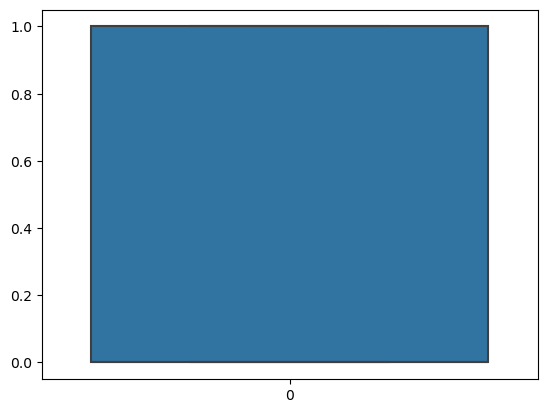

In [10]:
sns.boxplot(book['ChildBks'])
#there is no outlier

<Axes: >

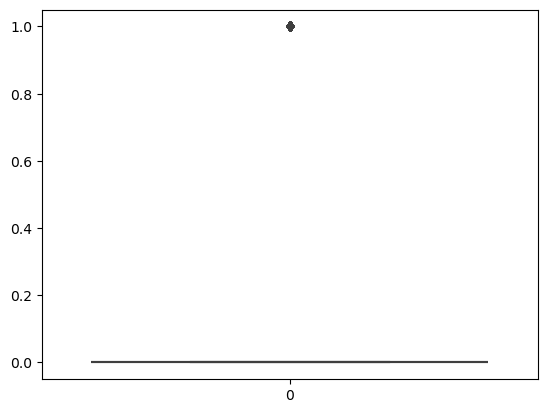

In [11]:
sns.boxplot(book['YouthBks'])
#there is outlier 

<Axes: >

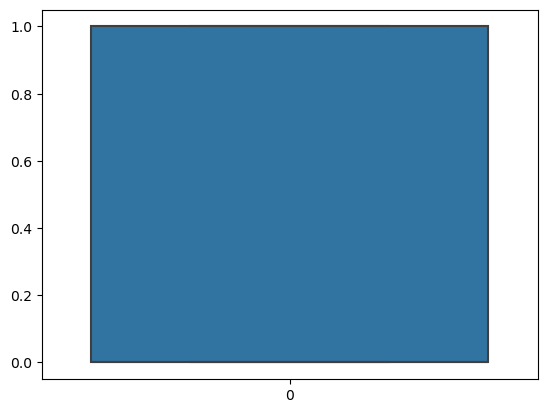

In [12]:
sns.boxplot(book['CookBks'])
#no outlier 

<Axes: >

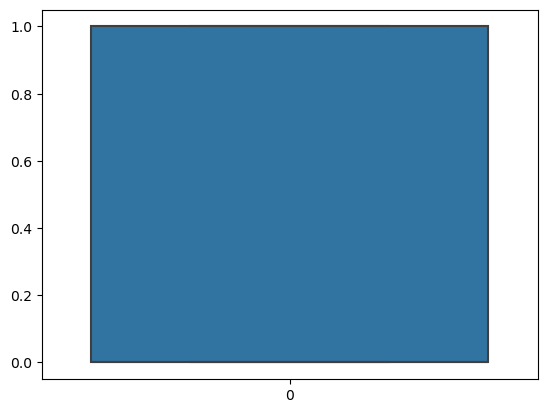

In [13]:
sns.boxplot(book['DoItYBks'])
#no outlier

<Axes: >

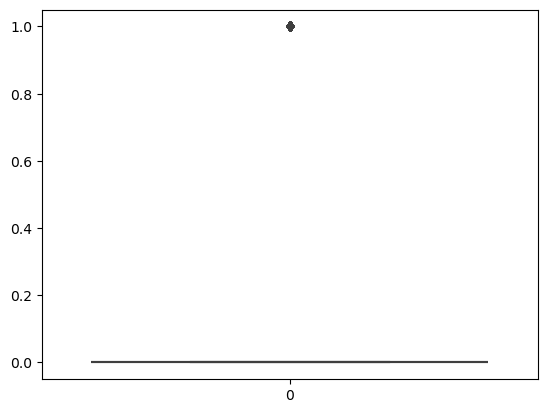

In [14]:
sns.boxplot(book['RefBks'])
#outlier

<Axes: >

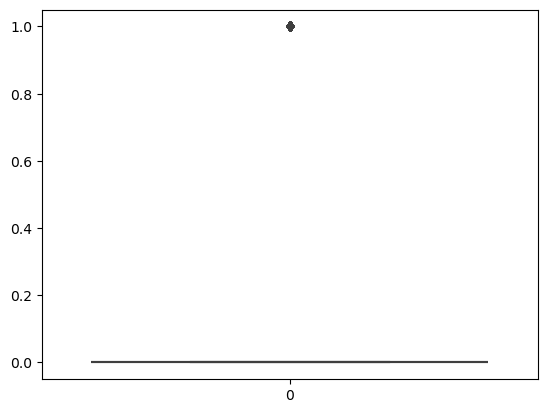

In [15]:
sns.boxplot(book['ArtBks'])
#outlier

<Axes: >

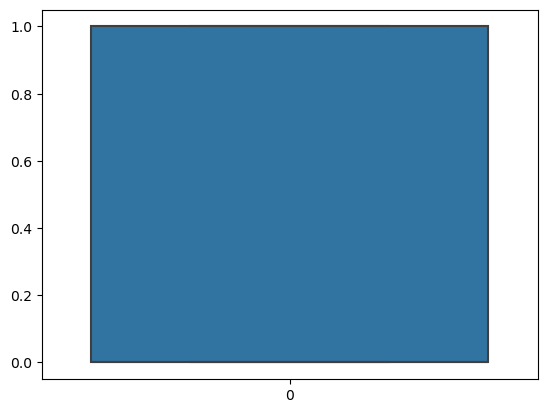

In [16]:
sns.boxplot(book['GeogBks']) 
#no outlier

<Axes: >

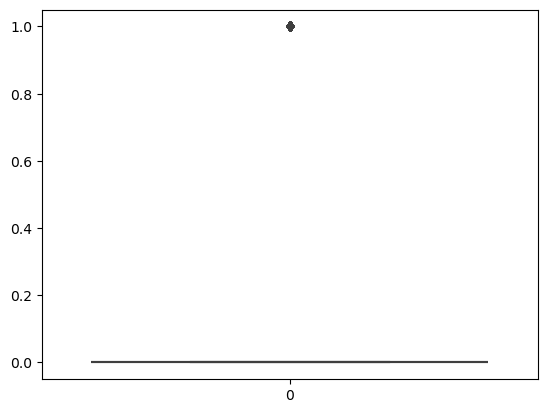

In [17]:
sns.boxplot(book['ItalCook']) 
#outlier

<Axes: >

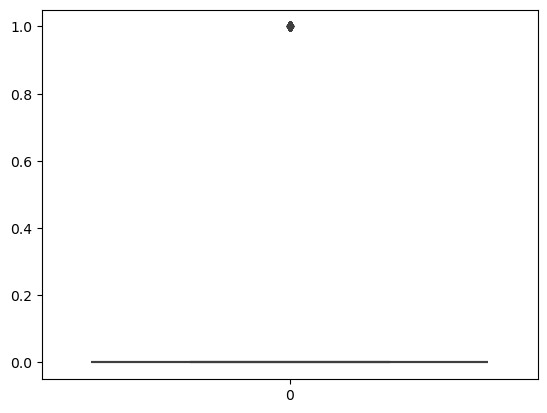

In [18]:
sns.boxplot(book['ItalAtlas']) 
#outlier

<Axes: >

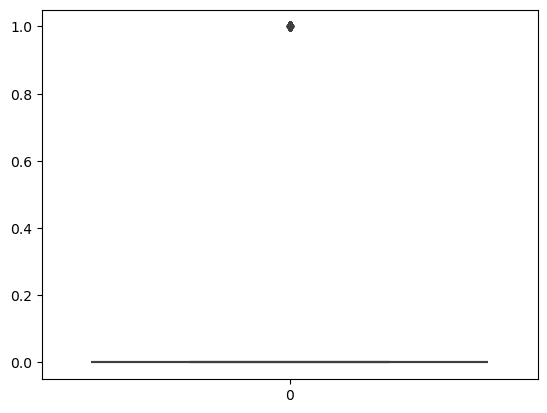

In [19]:
sns.boxplot(book['ItalArt']) 
#outlier

<Axes: >

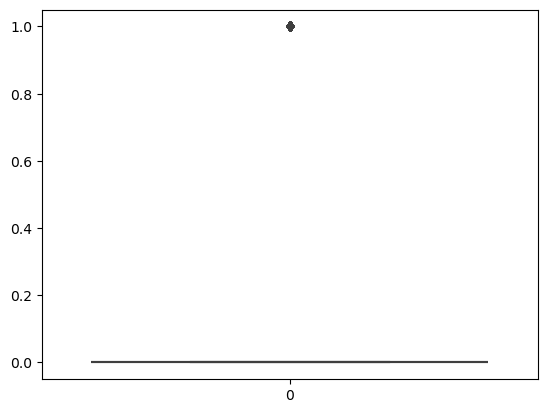

In [20]:
sns.boxplot(book['Florence']) 
#outlier


Data Pre-processing

<Axes: >

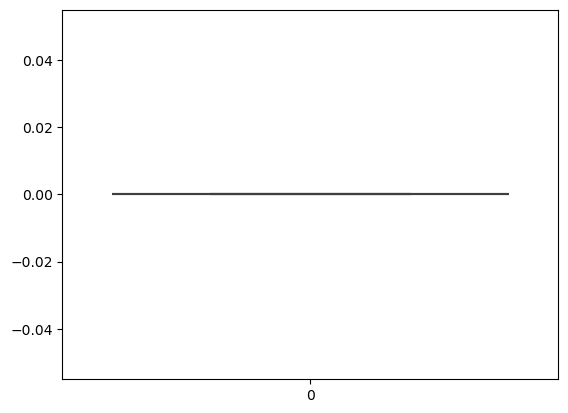

In [21]:
#for removing outlier we use IQR

#1.YouthBks
#caluculate q1 & q3
#q1=25th percentile
#q2=75th percentile
q1=book['YouthBks'].quantile(0.75)
q3=book['YouthBks'].quantile(0.25)
iqr = q3-q1
#determine limits for outlier
lower_limit = q1-1.5*(iqr)
upper_limit = q3+1.5*(iqr)
#Remove outlier
book['YouthBks'] = book.loc[(book['YouthBks']>=lower_limit) & (book['YouthBks']<=upper_limit), 'YouthBks']
sns.boxplot(book['YouthBks'])
#again from box plot we can see that outlier has removed

<Axes: >

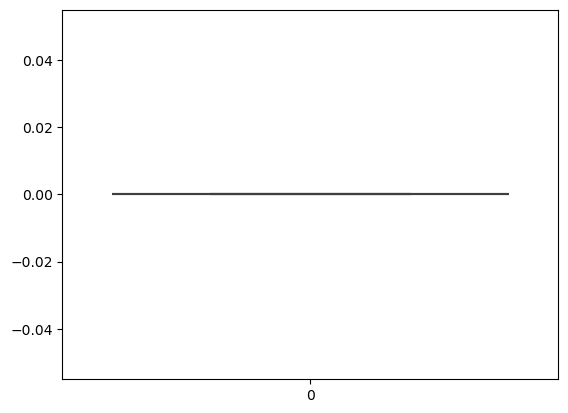

In [22]:
#2.RefBks
#caluculate q1 & q3
#q1=25th percentile
#q2=75th percentile
q1=book['RefBks'].quantile(0.75)
q3=book['RefBks'].quantile(0.25)
iqr = q3-q1
#determine limits for outlier
lower_limit = q1-1.5*(iqr)
upper_limit = q3+1.5*(iqr)
#Remove outlier
book['RefBks'] = book.loc[(book['RefBks']>=lower_limit) & (book['RefBks']<=upper_limit), 'RefBks']
sns.boxplot(book['RefBks'])
#again from box plot we can see that outlier has removed


<Axes: >

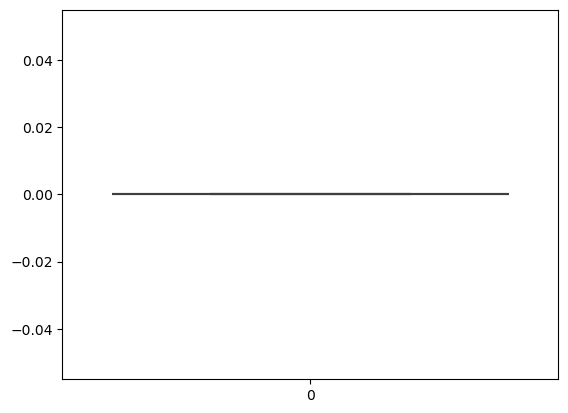

In [23]:
#3.ArtBks
#caluculate q1 & q3
#q1=25th percentile
#q2=75th percentile
q1=book['ArtBks'].quantile(0.75)
q3=book['ArtBks'].quantile(0.25)
iqr = q3-q1
#determine limits for outlier
lower_limit = q1-1.5*(iqr)
upper_limit = q3+1.5*(iqr)
#Remove outlier
book['ArtBks'] = book.loc[(book['ArtBks']>=lower_limit) & (book['ArtBks']<=upper_limit), 'ArtBks']
sns.boxplot(book['ArtBks'])
#again from box plot we can see that outlier has removed


<Axes: >

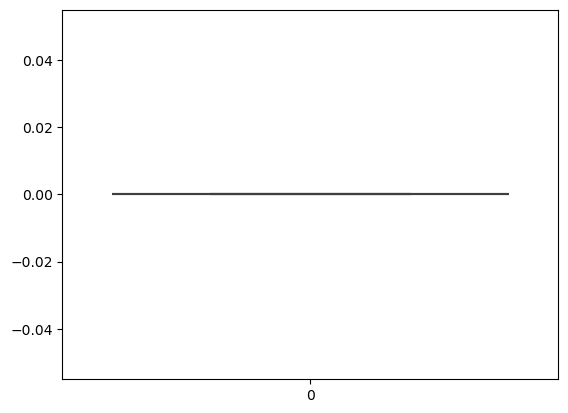

In [24]:
#4.ArtBks
#caluculate q1 & q3
#q1=25th percentile
#q2=75th percentile
q1=book['ItalCook'].quantile(0.75)
q3=book['ItalCook'].quantile(0.25)
iqr = q3-q1
#determine limits for outlier
lower_limit = q1-1.5*(iqr)
upper_limit = q3+1.5*(iqr)
#Remove outlier
book['ItalCook'] = book.loc[(book['ItalCook']>=lower_limit) & (book['ItalCook']<=upper_limit), 'ItalCook']
sns.boxplot(book['ItalCook'])
#again from box plot we can see that outlier has removed


<Axes: >

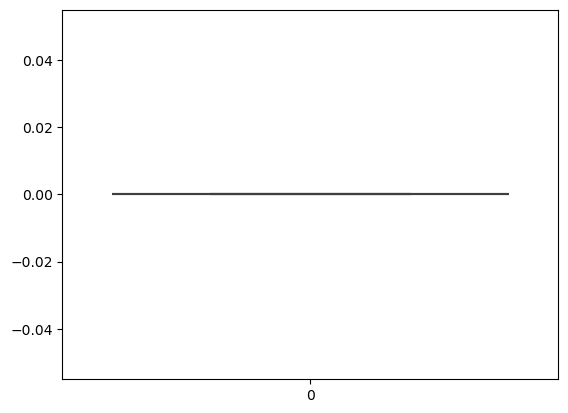

In [25]:
#5.ItalAtlas
#caluculate q1 & q3
#q1=25th percentile
#q2=75th percentile
q1=book['ItalAtlas'].quantile(0.75)
q3=book['ItalAtlas'].quantile(0.25)
iqr = q3-q1
#determine limits for outlier
lower_limit = q1-1.5*(iqr)
upper_limit = q3+1.5*(iqr)
#Remove outlier
book['ItalAtlas'] = book.loc[(book['ItalAtlas']>=lower_limit) & (book['ItalAtlas']<=upper_limit), 'ItalAtlas']
sns.boxplot(book['ItalAtlas'])
#again from box plot we can see that outlier has removed


<Axes: >

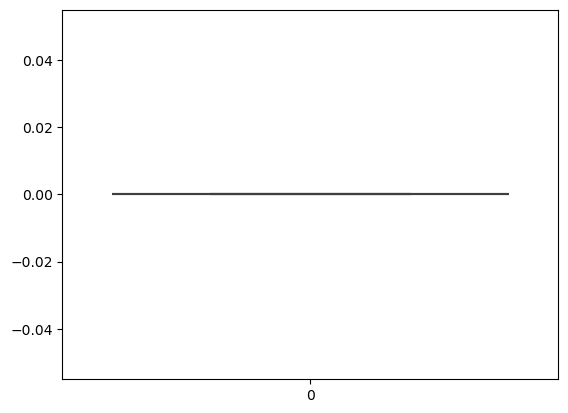

In [26]:
#6.ItalArt
#caluculate q1 & q3
#q1=25th percentile
#q2=75th percentile
q1=book['ItalArt'].quantile(0.75)
q3=book['ItalArt'].quantile(0.25)
iqr = q3-q1
#determine limits for outlier
lower_limit = q1-1.5*(iqr)
upper_limit = q3+1.5*(iqr)
#Remove outlier
book['ItalArt'] = book.loc[(book['ItalArt']>=lower_limit) & (book['ItalArt']<=upper_limit), 'ItalArt']
sns.boxplot(book['ItalArt'])
#again from box plot we can see that outlier has removed


<Axes: >

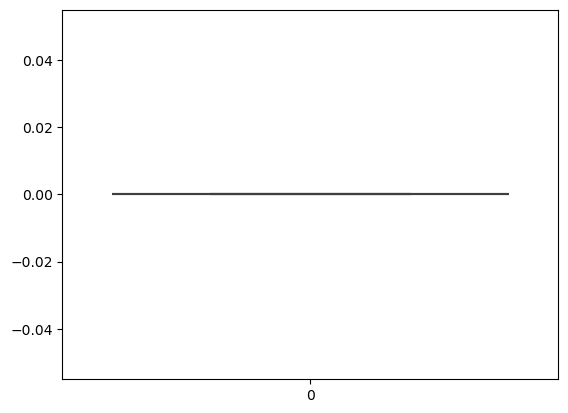

In [27]:
#7.Florence
#caluculate q1 & q3
#q1=25th percentile
#q2=75th percentile
q1=book['Florence'].quantile(0.75)
q3=book['Florence'].quantile(0.25)
iqr = q3-q1
#determine limits for outlier
lower_limit = q1-1.5*(iqr)
upper_limit = q3+1.5*(iqr)
#Remove outlier
book['Florence'] = book.loc[(book['Florence']>=lower_limit) & (book['Florence']<=upper_limit), 'Florence']
sns.boxplot(book['Florence'])
#again from box plot we can see that outlier has removed


In [28]:
book.describe()
#there is no need of normalization because all 
#values is between 0 to 1


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,1505.0,2000.00000,2000.000000,1571.0,1518.0,2000.000000,1773.0,1926.0,1903.0,1783.0
mean,0.423000,0.0,0.43100,0.282000,0.0,0.0,0.276000,0.0,0.0,0.0,0.0
std,0.494159,0.0,0.49534,0.450086,0.0,0.0,0.447129,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,1.000000,0.0,1.00000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
max,1.000000,0.0,1.00000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0


In [29]:
book.isna().sum()

ChildBks       0
YouthBks     495
CookBks        0
DoItYBks       0
RefBks       429
ArtBks       482
GeogBks        0
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [32]:
#now here nan value is present
#we can remove it by mean imputation
book.fillna(book.mean(), inplace=True)

In [33]:
book.isna().sum()
#now there is no any nan value


ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

Association Rule:

In [35]:
#step1:convert the dataset into a format suitable for Apriori 
a = TransactionEncoder()
k = a.fit_transform(book)
book1 = pd.DataFrame(k,columns=a.columns_)


In [36]:
#step2:Apply the Apriori algorithm to find frequent itemsets
frequent = apriori(book1,min_support=0.005,use_colnames=True) 
print(frequent)
for support in [0.05, 0.04, 0.03, 0.02, 0.01]:
    frequent = apriori(book1, min_support=support, use_colnames=True)
    print(f"min_support={support}, number of frequent itemsets: {len(frequent)}")


Empty DataFrame
Columns: [support, itemsets]
Index: []
min_support=0.05, number of frequent itemsets: 0
min_support=0.04, number of frequent itemsets: 0
min_support=0.03, number of frequent itemsets: 0
min_support=0.02, number of frequent itemsets: 0
min_support=0.01, number of frequent itemsets: 0


Item Frequencies:
 s    8
k    8
B    7
t    6
o    6
l    5
I    4
A    3
r    3
e    3
a    3
C    3
h    2
Y    2
c    1
d    1
f    1
g    1
i    1
R    1
n    1
G    1
F    1
D    1
u    1
dtype: int64


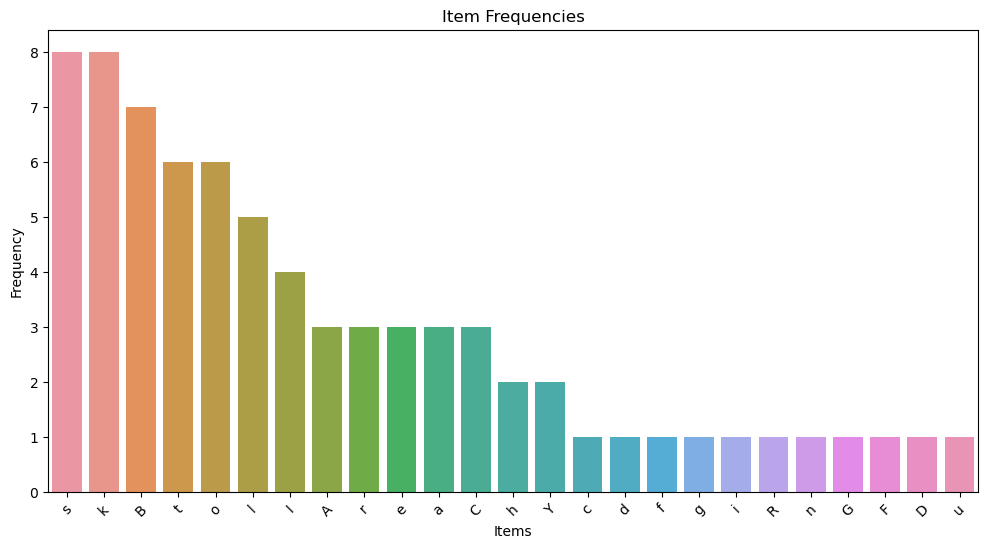

In [37]:
item_frequencies = book1.sum().sort_values(ascending=False)
print("Item Frequencies:\n", item_frequencies)
plt.figure(figsize=(12, 6))
sns.barplot(x=item_frequencies.index, y=item_frequencies.values)
plt.xticks(rotation=45)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Item Frequencies')
plt.show()

In [38]:
# Load your data (already done)
df = pd.read_csv("C:/Assignments(DS)/book.csv")  # Update with your file path if needed


In [39]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)


C:\Users\om\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [40]:
# View the frequent itemsets
print(frequent_itemsets)


    support                                          itemsets
0    0.4230                                        (ChildBks)
1    0.2475                                        (YouthBks)
2    0.4310                                         (CookBks)
3    0.2820                                        (DoItYBks)
4    0.2145                                          (RefBks)
..      ...                                               ...
95   0.0600            (YouthBks, GeogBks, DoItYBks, CookBks)
96   0.0560              (ArtBks, YouthBks, GeogBks, CookBks)
97   0.0650              (ArtBks, GeogBks, DoItYBks, CookBks)
98   0.0510  (DoItYBks, GeogBks, CookBks, ChildBks, YouthBks)
99   0.0535    (DoItYBks, GeogBks, CookBks, ChildBks, ArtBks)

[100 rows x 2 columns]


In [41]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# print(rules)
print(rules[['antecedents','consequents','support','confidence']])

    antecedents                             consequents  support  confidence
0    (ChildBks)                              (YouthBks)   0.1650    0.390071
1    (YouthBks)                              (ChildBks)   0.1650    0.666667
2    (ChildBks)                               (CookBks)   0.2560    0.605201
3     (CookBks)                              (ChildBks)   0.2560    0.593968
4    (ChildBks)                              (DoItYBks)   0.1840    0.434988
..          ...                                     ...      ...         ...
657  (DoItYBks)    (ChildBks, GeogBks, ArtBks, CookBks)   0.0535    0.189716
658   (GeogBks)   (ChildBks, ArtBks, DoItYBks, CookBks)   0.0535    0.193841
659   (CookBks)   (ChildBks, ArtBks, GeogBks, DoItYBks)   0.0535    0.124130
660  (ChildBks)    (ArtBks, GeogBks, DoItYBks, CookBks)   0.0535    0.126478
661    (ArtBks)  (ChildBks, GeogBks, DoItYBks, CookBks)   0.0535    0.221992

[662 rows x 4 columns]


Benifit:


Benifit to customer:

Using association rules helps businesses better understand customer 
purchasing patterns, enabling more informed decisions in marketing, promotions,
and product recommendations. This can lead to increased sales, better customer engagement, 
and optimized inventory management.

